In [1]:
import cv2
import os
import subprocess
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [7]:
# Parameters
image_size = (512, 512)
batch_size = 32
epochs = 20
learning_rate = 0.0002

# Dataset Path
dataset = 'D:/FYP/Dataset/Dataset for LUTs/New_Dataset_4/training'

In [8]:
# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = datagen.flow_from_directory(dataset,target_size=image_size,batch_size=batch_size,class_mode='categorical',subset='training', shuffle=True)

validation_generator = datagen.flow_from_directory(dataset, target_size=image_size, batch_size=batch_size, class_mode='categorical', subset='validation',shuffle=True)

Found 288 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [9]:
# Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*image_size, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

In [10]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Training
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20
9/9 [==============================] - 57s 6s/step - loss: 1.1577 - accuracy: 0.3785 - val_loss: 1.0978 - val_accuracy: 0.3750
Epoch 2/20
9/9 [==============================] - 51s 6s/step - loss: 0.9896 - accuracy: 0.4931 - val_loss: 1.0682 - val_accuracy: 0.3750
Epoch 3/20
9/9 [==============================] - 52s 6s/step - loss: 0.8413 - accuracy: 0.7222 - val_loss: 1.0369 - val_accuracy: 0.4583
Epoch 4/20
9/9 [==============================] - 52s 6s/step - loss: 0.7555 - accuracy: 0.7743 - val_loss: 1.0559 - val_accuracy: 0.4028
Epoch 5/20
9/9 [==============================] - 51s 6s/step - loss: 0.6848 - accuracy: 0.8194 - val_loss: 1.0647 - val_accuracy: 0.3889
Epoch 6/20
9/9 [==============================] - 52s 6s/step - loss: 0.6201 - accuracy: 0.8576 - val_loss: 1.0767 - val_accuracy: 0.3750
Epoch 7/20
9/9 [==============================] - 52s 6s/step - loss: 0.5635 - accuracy: 0.8681 - val_loss: 1.0680 - val_accuracy: 0.4306
Epoch 8/20
9/9 [==================

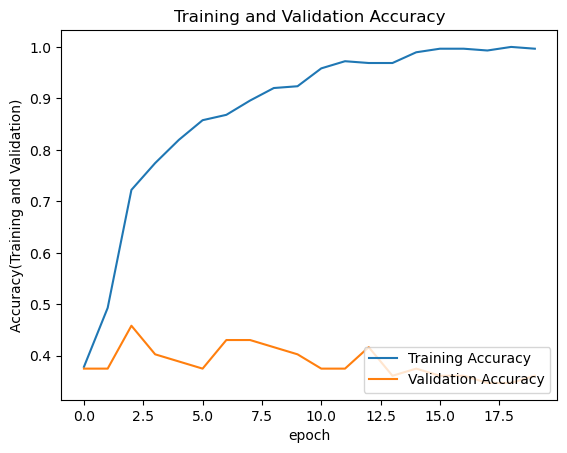

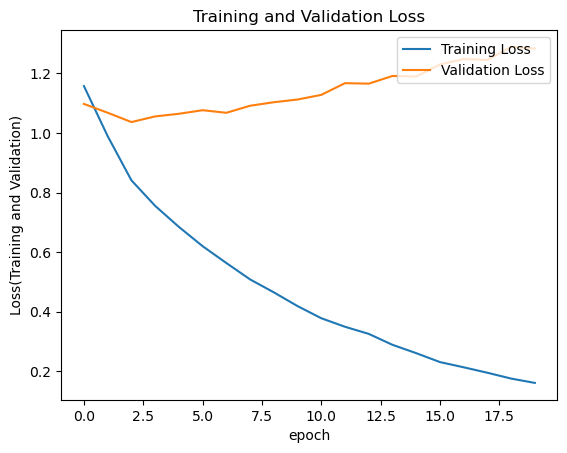

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy(Training and Validation)')
plt.xlabel('epoch')
plt.legend(loc='lower right')
#plt.legend(['Training'],['Validation'], loc='upper left')
plt.title('Training and Validation Accuracy')

#plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylabel('Loss(Training and Validation)')
plt.xlabel('epoch')
#plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.legend(loc='upper right')
plt.legend(loc='upper right')
plt.show()

In [13]:
# Save the model
model.save('portrait_preset_model.h5')